# Text Mining and Natural Language Processing


This set of notes focuses on the basiscs of processing free text data.  In addition to the more structured relational data and graphs we have discussed previously, free text makes up one of the most common types of "widely available" data: web pages, unstructured "comment" fields in many relational databases, and many other easily-obtained large sources of data naturally come in free text form.  The notable difference, of course ,is that unlike the data types we have discussed before, free text lacks the "easily extractable" structure inherent in the previous types of data we have considered.

This is not to say, of course, that free text data lacks structure.  Just the opposite: by its very definition free text usually needs to have meaning to the people who are reading that data.  But the task of actually understanding this structure is a problem that is still beyond the scope of "generic" data science tools, because it often involves human-level intelligence (or at least bringing to bear an enormous amount of external context) to understand the meaning behind the text.  
This is also naturally a debatable point, and this particular perspective on free text data is one that may need to be reconsidered based upon advances in the upcoming years. 


## Free text in data science

As mentioned above, the goal that we will consider here of using free text in data science is to extract some meaningful information from the text, _without_ any deep understanding of its meaning.  The reason for this is simple: extracting deep understanding from text is hard.


### Natural language processing/understanding
The general field of Natural Language Processing (some might differentiate between NLP and "natural language understanding", but for our purposes here you can think of these synonymously) looks to truly understand the structure behind free text, e.g. perform tasks like parse the sentences grammatically, describe the general entities and properties that the text is referring to, etc.  But it is easy to come up with examples of why this can be hard.  For example, consider he following example, known as a Winograd schema:

> The city councilmen refused the demonstrators a permit because they [feared/advocated] violence.

If you read the sentence:
 
> The city councilmen refused the demonstrators a permit because they feared violence.

then it is fairly obviously that the "they" here refers to the city councilmen; fearing violence would not be a reason for denying someone a permit, so clearly it is the councilmen that fear violence.  On the other hand, in the sentence

> The city councilmen refused the demonstrators a permit because they advocated violence.

the "they" term clearly applies to the demonstrators (the city councilmen presumably would not advocate for violence, let along deny someone a permit because they, the councilmen, were advocating violence).  The point of all this (and this was the original point of these examples, which were originally proposed by Terry Winograd in 1972) is that when we do something "simple", like parse a sentence, we bring to bear an enormous amount of outside knowledge and context to this action.  Unlike say, XML documents, there is no internally-specified format that makes language unambiguous; it could be unambiguous only because of external context and knowledge, or it could even be completely ambiguous.  Or in a different vein, there can be grammatically-incorrect sentences that still have clear syntactic meaning, and there can be grammatically-correct sentences that are meaningful.


### Free text in data science

Fortunately, for many data science tasks, we can still extract considerable information from text _while only understanding it at an extremely rudimentary level_.  Consider the following two reviews for the same movie:

> ... truly, a stunning exercise in large-scale filmmaking; a beautifully-assembled picture in which Abrams combines a magnificent cast with a marvelous flair for big-screen, sci-fi storytelling.

and

> It's loud and full of vim -- but a little hollow and heartless.

Understanding that the first review is positive, while the second review is negative, doesn't take any deep understand of the language itself, it can be done by simple keyword lookup: "stunning" and "marvelous" are associated with a positive review, while "hollow" and "heartless" are associated with negative reviews.  Now, of course it's possible to use more complex language to signify a positive review while using some "negative" words, with statements like, "not at all boring".  But people don't usually write exclusively in this manner (doing so would be "not at all clear"), so that the general sentiment of text can still come through very easily even with a few instances where the words themselves can throw you off.


**Terminology:** Before we begin, a quick note on terminology.  In these notes "document" will mean an individual group of free text data (this could be an actual document or a text field in a database).  "Words" or "terms" refer to individual tokens separated by whitespace, and additionally also refers to puncutation (so we will often separate punctuation explicitly from the surounding words.  "Corpus" refers to a collection of documents, and we will sometimes refer to the set of all _unique_ words/tokens in the corpus as the "vocabulary".


The methods of text mining learned in the lecture are presented in this tutorial. We will deal extensively with tokenization and feature reduction methods. Then we will implement a simple text classification algorithm. We will herein examine the Bag of Word model in more detail and will implement both "Total Count" and "TD-IDF".
For this topic we will use the Natural Language Toolkit, `nltk` library. https://www.nltk.org

**Content**
1. Tokenization
    1. Simple Tokenizer
    2. Sentence Tokenizer
    3. Word Tokenizer
2. Feature Reduction
    1. Stop-Words
    2. Stemming
    3. Lemmatization
3. Text Classification
    1. Total Count
    2. TD-IDF

## Bag of words models and TFIDF

The bag of words model is by far the most common means of representing documents in data science.  Under this model, a document is described soley by the set of words (and possibly their counts) that make up the document.  All information about the actual ordering of the words is ignored.  


In [1]:
import nltk

In [2]:
text="""Hello Mr. Ritter, how are you doing today? The University of Cologne is awesome. 
The exam will be quite easy. You shouldn't be worried. Are you interested in studying here?"""

`re` is useful package in python for text processing services.

In [3]:
# Trivial approach to tokenize text with regular expressions
import re 
tokenized_text=re.split("\.|\?", text)
print(tokenized_text)

['Hello Mr', ' Ritter, how are you doing today', ' The University of Cologne is awesome', ' \nThe exam will be quite easy', " You shouldn't be worried", ' Are you interested in studying here', '']


In [4]:
# Sentence Tokenization 

#nltk.download('punkt')
from nltk.tokenize import sent_tokenize

tokenized_text = sent_tokenize(text)

print(tokenized_text)


['Hello Mr. Ritter, how are you doing today?', 'The University of Cologne is awesome.', 'The exam will be quite easy.', "You shouldn't be worried.", 'Are you interested in studying here?']


In [5]:
# Word Tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(text)

print(tokenized_word)

['Hello', 'Mr.', 'Ritter', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'University', 'of', 'Cologne', 'is', 'awesome', '.', 'The', 'exam', 'will', 'be', 'quite', 'easy', '.', 'You', 'should', "n't", 'be', 'worried', '.', 'Are', 'you', 'interested', 'in', 'studying', 'here', '?']


In [33]:
# Analyze frequency distribution of words

from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 31 samples and 37 outcomes>


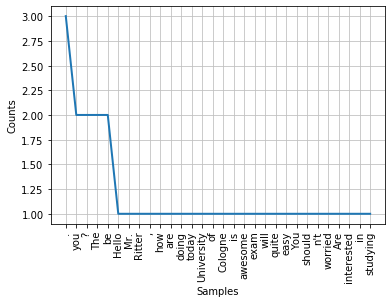

In [34]:
import matplotlib.pyplot as plt


fdist.plot(30,cumulative=False)
plt.show()

### Dimension Reduction
In the lecture we learned that we use a dedicated feature dimension (i.e., column) for each word. However, most languages consist of several hundred thousand up to millions of words. Accordingly, the feature space becomes very large and we quickly reach our limits (e.g., Curse of Dimensionality). Text Mining offers us methods to reduce the number of dimensions. In the following we will look at "Stop-Word", "Stemming" and "Lemmatization".

In [8]:
# Load Stopwords

#nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words=set(stopwords.words("english"))

print(stop_words)

{'of', 'as', 'and', "it's", 'both', 'how', 'was', 'are', 'because', 'myself', 'only', 'during', 'been', 'aren', 'they', 'but', 'out', 'didn', 'no', 'mustn', 'by', 'she', 't', 'very', "aren't", "isn't", 'until', 'now', 'am', 'down', "shan't", 'its', 'about', 'some', 'll', 'm', "hasn't", 'shan', 'them', 'shouldn', 's', "that'll", "don't", 'don', "doesn't", "shouldn't", 'nor', 'itself', 'just', 'same', 'is', "won't", 'he', 'below', 'ourselves', 'own', 'can', 'further', 'her', 'themselves', 'all', 'once', 'doesn', 'this', 'while', 'o', 'a', 'my', "hadn't", 'an', 'or', 'had', 'there', "you've", "needn't", 'have', 'were', 'from', 'more', "you'd", 'who', 'that', 'what', "wouldn't", 'do', 'with', 'again', "she's", 'will', 'needn', 'me', 'our', 'up', 'in', "should've", 'so', "didn't", 'each', 'did', "mightn't", 'when', 'be', 'won', 'between', "you're", 'herself', 'hasn', 'other', 'yours', 'does', 'i', 'theirs', 'not', 'such', 'for', 'their', 'yourselves', 'through', 'wasn', 'his', 'these', 'tho

In [9]:
# Filter out stop words
filtered_sent=[]
for w in tokenized_word: # tokenized words from my input text
    if w not in stop_words:
        filtered_sent.append(w) # use this word in machine learning tasks
print("Tokenized Sentence:\n ",tokenized_word)
print("\n Filterd Sentence:\n ",filtered_sent)

Tokenized Sentence:
  ['Hello', 'Mr.', 'Ritter', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'University', 'of', 'Cologne', 'is', 'awesome', '.', 'The', 'exam', 'will', 'be', 'quite', 'easy', '.', 'You', 'should', "n't", 'be', 'worried', '.', 'Are', 'you', 'interested', 'in', 'studying', 'here', '?']

 Filterd Sentence:
  ['Hello', 'Mr.', 'Ritter', ',', 'today', '?', 'The', 'University', 'Cologne', 'awesome', '.', 'The', 'exam', 'quite', 'easy', '.', 'You', "n't", 'worried', '.', 'Are', 'interested', 'studying', '?']


In [35]:
# Stemming - Reduce a word into its word root, that meaning, cut off the suffixes. 
# This could lead to stems which are not grammatically correct.

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer() # https://de.wikipedia.org/wiki/Porter-Stemmer-Algorithmus

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:\n ",filtered_sent)
print("Stemmed Sentence:\n ",stemmed_words)

Filtered Sentence:
  ['Hello', 'Mr.', 'Ritter', ',', 'today', '?', 'The', 'University', 'Cologne', 'awesome', '.', 'The', 'exam', 'quite', 'easy', '.', 'You', "n't", 'worried', '.', 'Are', 'interested', 'studying', '?']
Stemmed Sentence:
  ['hello', 'mr.', 'ritter', ',', 'today', '?', 'the', 'univers', 'cologn', 'awesom', '.', 'the', 'exam', 'quit', 'easi', '.', 'you', "n't", 'worri', '.', 'are', 'interest', 'studi', '?']


In [11]:
# Lemmatization - Reduces a word to its base word. 
# This method is more sophisticated than stemming since it leverage contextual information and a dictionary.
# However, result may depend on the chosen dictionary.

#nltk.download('wordnet') # WordNet is just another NLTK corpus reader, and can be imported like this:

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

lemmatized_words=[]
for w in filtered_sent:
    lemmatized_words.append(lem.lemmatize(w,"v"))

print("Filtered Sentence:",filtered_sent)
print("Lemmatized Sentence:",lemmatized_words)

Filtered Sentence: ['Hello', 'Mr.', 'Ritter', ',', 'today', '?', 'The', 'University', 'Cologne', 'awesome', '.', 'The', 'exam', 'quite', 'easy', '.', 'You', "n't", 'worried', '.', 'Are', 'interested', 'studying', '?']
Lemmatized Sentence: ['Hello', 'Mr.', 'Ritter', ',', 'today', '?', 'The', 'University', 'Cologne', 'awesome', '.', 'The', 'exam', 'quite', 'easy', '.', 'You', "n't", 'worry', '.', 'Are', 'interest', 'study', '?']


Despite the obvious information we are throwing away with this representation, it send to work surpringingly well in practice, for the precise reason we mentioned above, that the general "gist" of many documents can be obtained with only looking at the presence/absence of words in the text.

In these notes, we'll cover a simple example of creating so-called TFIDF vectors, which represent the documents via a (weighted) bag of words model. We will then using these to compute the similarity between documents.  This technique is a common approach for applications like document retrieval and or search.

### Term frequency

In our example, let's begin with our corpus that contains the following three documents:

In [12]:
documents = ["the goal of this lecture is to explain the basics of free text processing",
             "the bag of words model is one such approach",
             "text processing via bag of words"]

In this setting, we can represent the documents using a _term frequency_ matrix, and $m \times n$ matrix where $m$ denotes the number of documents, and $n$ denotes the vocabulary size (i.e., the number of unique words across all documents).  To see (the naive way of) how to construct this list, let's first consider a simple way to get a list of all unique words across all documents.  In general there is no need to actually sort the list of words, but we will do so for simplicity here.  It's a good idea to also generate a dictionary that maps words to their index in this list, as we'll frequently want to look up the index corresponding to a word.

In [13]:
document_words = [doc.split() for doc in documents]
vocab = sorted(set(sum(document_words, [])))
vocab_dict = {k:i for i,k in enumerate(vocab)}
print(vocab, "\n")
print(vocab_dict, "\n")

['approach', 'bag', 'basics', 'explain', 'free', 'goal', 'is', 'lecture', 'model', 'of', 'one', 'processing', 'such', 'text', 'the', 'this', 'to', 'via', 'words'] 

{'approach': 0, 'bag': 1, 'basics': 2, 'explain': 3, 'free': 4, 'goal': 5, 'is': 6, 'lecture': 7, 'model': 8, 'of': 9, 'one': 10, 'processing': 11, 'such': 12, 'text': 13, 'the': 14, 'this': 15, 'to': 16, 'via': 17, 'words': 18} 



Now let's construct a matrix that contains word counts (term frequencies) for all the documents.  We'll also refer to the term frequency of the $j$th word in the $i$th library as $\mathrm{tf}_{i,j}$.

In [14]:
import numpy as np
X_tf = np.zeros((len(documents), len(vocab)), dtype=int)
for i,doc in enumerate(document_words):
    for word in doc:
        X_tf[i, vocab_dict[word]] += 1
print(X_tf)

[[0 0 1 1 1 1 1 1 0 2 0 1 0 1 2 1 1 0 0]
 [1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1]]


As mentioned above, each of the _rows_ in this matrix correponds to one of the three documents above, and each column correponds to one of the 19 words.  Importantly, note that in practice (for instance on the homework), you will want to create term frequency matrices directly in sparse format, because the term frequency matrix is itself typically sparse (when there are a large number of documents, many words will only be contained in a small number of the document).

In this case, we had the entry in our term frequency matrix just correspond to the number of occurences of that term.  But there are other possibilities as well:

* The entry can be binary: 1 if the term occurs (any number of times), and 0 otherwise.  This somewhat mitigates the significance of common words that may occur very frequently.
* A nonlinear scaling, e.g. $\log (1+\mathrm{tf}_{i,j})$, which lies somewhere between the binary case and the raw counts.
* A scaled version of term frequencies, e.g., scaling by the maximum term frequency in the document, $\mathrm{tf}_{i,j} / \max_k \mathrm{tf}_{i,k}$.  (Note that this won't affect the actual similarity scores we'll discuss next, because we will ultimately scale each document but it affects the term frequency matrix itself, of course).

### Inverse document frequency

An obvious issue with using normal term frequency counts to represent a document is that the document's vector (and the resulting similarities we will consider) will often be "dominated" by very common words, for example: "of", "the", "is", in the preceeding example documents.  This issue can be mitigated to some extent by excluding so-called "stop words" (common English words like "the", "a", "of" that aren't considered relevant to the particular documents) from the term frequency matrix.  But this still ignores the case where a word that may not be a generic stop word still happens to occur in a very large number of documents.  Intuitively, we expect that the most "important" words in a document are precisely those that only occur in some relatively small number of documents, so that we want to discount the weight of very frequently-occurring terms.

This can be accomplished via the inverse document frequency weight for words.  Just as with term frequencies, there are some different weightings of this term, but the most common formulation is
\begin{equation}
\mathrm{idf}_j = \log\left(\frac{\mbox{# documents}}{\mbox{# documents with word $j$}}\right).
\end{equation}
As an example, if the word is contained in every document, then the inverse document frequency weight will be zero (log of one).  In contrast, if a word occurs in only one document, its inverse document frequency will be $\log (\mbox{# documents})$.

Note that inverse document frequency is a _per word_ term, as opposed to term frequency, which is _per word and document_.  We can compute inverse document frequency for our data set as follows, which mainly just requires counting how many documents contain each word.

In [15]:
idf = np.log(X_tf.shape[0]/X_tf.astype(bool).sum(axis=0))
print(idf)

[1.09861229 0.40546511 1.09861229 1.09861229 1.09861229 1.09861229
 0.40546511 1.09861229 1.09861229 0.         1.09861229 0.40546511
 1.09861229 0.40546511 0.40546511 1.09861229 1.09861229 1.09861229
 0.40546511]


### TFIDF

The term frequency inverse document frequency (TFIDF) combination simply scales the columns of the term frequency matrix by their inverse document frequency.  In doing so, we still have an effective bag of words representation of each document, but we do so with the weighting implied by the inverse document frequency: discouting words that occur very frequently, and increasing the weight of less frequent terms.

In [16]:
X_tfidf = X_tf * idf
print(X_tfidf)

[[0.         0.         1.09861229 1.09861229 1.09861229 1.09861229
  0.40546511 1.09861229 0.         0.         0.         0.40546511
  0.         0.40546511 0.81093022 1.09861229 1.09861229 0.
  0.        ]
 [1.09861229 0.40546511 0.         0.         0.         0.
  0.40546511 0.         1.09861229 0.         1.09861229 0.
  1.09861229 0.         0.40546511 0.         0.         0.
  0.40546511]
 [0.         0.40546511 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.40546511
  0.         0.40546511 0.         0.         0.         1.09861229
  0.40546511]]


### Cosine similarity

Given a TFIDF (or just term frequency) matrix, one of the more common questions to address is to compute similarity between multiple documents in the corpus.  The common metric for doing so is to compute the cosine similarity between two different documents.  This is simply a normalize inner product between the vectors describing each documents.  Specifically,
\begin{equation}
\mbox{CosineSimilarity}(x,y) = \frac{x^T y}{\|x\|_2 \cdot \|y\|_2}.
\end{equation}
The cosine similarity is a number between zero (meaning the two documents share no terms in common) and one (meaning the two documents have the exact same term frequency or TFIDF representation).  In fact, the cosine similarity is exactly the converse of the squared Eucliean distance between the normalized document vectors; formally, for $\tilde{x} = x / \|x\|_2$ and $\tilde{y} = y / \|y\|_2$, 
\begin{equation}
\begin{split}
\frac{1}{2}\|\tilde{x} - \tilde{y}\|_2^2 & = \frac{1}{2}(\tilde{x} - \tilde{y})^T (\tilde{x} - \tilde{y}) \\
& = \frac{1}{2} (\tilde{x}^T \tilde{x} - 2 \tilde{x}^T \tilde{y} + \tilde{y}^T \tilde{y}) \\
& = \frac{1}{2} (1 - 2 \tilde{x}^T \tilde{y} + 1) \\
& = 1 - \mbox{CosineSimilarity}(x,y).
\end{split}
\end{equation}

We can compute cosine similarity between the TFIDF vectors in our corpus as follows.

In [17]:
X_tfidf_norm = X_tfidf / np.linalg.norm(X_tfidf, axis=1)[:,None]
M = X_tfidf_norm @ X_tfidf_norm.T
print(M)

[[1.         0.06796739 0.07771876]
 [0.06796739 1.         0.10281225]
 [0.07771876 0.10281225 1.        ]]


We could also look at the cosine similarity with the ordinary term frequency matrix.

In [18]:
X_tf_norm = X_tf / np.linalg.norm(X_tf, axis=1)[:,None]
M = X_tf_norm @ X_tf_norm.T
print(M)

[[1.         0.3928371  0.38490018]
 [0.3928371  1.         0.40824829]
 [0.38490018 0.40824829 1.        ]]


As expected, using the term frequency matrix results in substantially higher scores: the inclusion of words that occur across many of the documents add positive terms to the inner product between the document vectors, resulting in higher similarity scores.  Note, however, that the distances are typically _all_ scaled up, meaning that the relative distances are not necssarily any more informative than the TFIDF similarities (indeed, it is typically less informative, since the scores are inflated by the "random" occurance of multiple high-frequency words).

# Case Study: Text Classification for Movie Data

**Objective**
Compute the sentiment (i.e., if text has a postive or negative connotation) of text documents. 

Example: News Article about politicians or companies. Might be used to identify "shitstorms" or predict stock prices (www.stockpulse.com).

**Steps**
- Tokenization
- Preprocessing (Remove Stop Words, Stemming and Lemmatization)
- Bag of Words Model
- TF-IDF
- Model Building
- Model Evaluation

*Data Source*
Rotten Tomato Movie Reviews
https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data

In [19]:
import pandas as pd

In [20]:
# Load Data 
data=pd.read_csv('train.tsv', sep='\t')

In [21]:
# First impressions of the present data
data.head(20)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [22]:
# Explore the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [23]:
# Sentiment distribution
# 0 - negative 1 - somewhat negative 2 - neutral 3 - somewhat positive 4 - positive
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

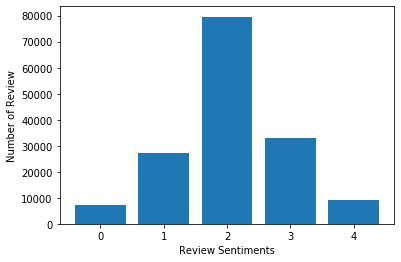

In [24]:
from matplotlib import pyplot as plt

# Visualize sentiment distribution 
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

## Bag of Words Model

In [25]:
from sklearn.feature_extraction.text import CountVectorizer #Convert a collection of text documents to a matrix of token counts
from nltk.tokenize import word_tokenize

# lowercase=True - convert all characters to lowercase
# stop_words='englisch' - remove all stopwords based on the english language
# ngram_range = (1,1) -   
# Word Tokenizer
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1), tokenizer = word_tokenize)
text_counts= cv.fit_transform(data['Phrase'])

In [26]:
# Term Document Matrix (document, term) - "total count"
print(text_counts)

  (0, 28)	1
  (0, 13713)	1
  (0, 707)	1
  (0, 716)	1
  (0, 9800)	1
  (0, 23)	1
  (0, 5904)	1
  (0, 6169)	1
  (0, 6145)	2
  (0, 397)	1
  (0, 3745)	1
  (0, 4852)	1
  (0, 12632)	1
  (1, 6169)	1
  (1, 6145)	1
  (1, 397)	1
  (1, 3745)	1
  (1, 4852)	1
  (1, 12632)	1
  (2, 12632)	1
  (4, 12632)	1
  (5, 6169)	1
  (5, 6145)	1
  (5, 397)	1
  (5, 3745)	1
  :	:
  (156050, 9789)	1
  (156050, 12191)	1
  (156051, 9789)	1
  (156051, 12191)	1
  (156052, 12191)	1
  (156053, 2504)	1
  (156053, 1152)	1
  (156053, 6625)	1
  (156053, 5619)	1
  (156053, 1452)	1
  (156053, 19)	1
  (156054, 2504)	1
  (156054, 1152)	1
  (156054, 6625)	1
  (156054, 5619)	1
  (156054, 19)	1
  (156055, 6625)	1
  (156055, 19)	1
  (156056, 2504)	1
  (156056, 1152)	1
  (156056, 5619)	1
  (156057, 2504)	1
  (156057, 1152)	1
  (156058, 1152)	1
  (156059, 2504)	1


## Training and Test Set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Sentiment'], test_size=0.3, random_state=123)

## Model Building and Evaluation

The multinomial Naive Bayes classifier is suitable for classification with
discrete features (e.g., word counts for text classification). The
multinomial distribution normally requires integer feature counts. However,
in practice, fractional counts such as tf-idf may also work.

In [28]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6095518817548806


## Use TF-IDF instead of Total Count

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = word_tokenize)
text_tf= tf.fit_transform(data['Phrase'])

In [30]:
# Training and Test Sets

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, data['Sentiment'], test_size=0.3, random_state=123)

## Model Evaluation for TF-IDF Weighting

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5904780212738691


----